<a href="https://colab.research.google.com/github/RashmiDhakal/Deep-Learning/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediciting Pseumonia with chest X-Ray Images using CNN

###### importing the Libraries required for exploration

In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2
from PIL import Image

In [ ]:
## organizing the paths

In [ ]:
train_folder = os.path.join("train")
test_folder = os.path.join("test")

In [ ]:
# for the train data
pneumonia_train_images= glob.glob(train_folder+"/PNEUMONIA/*.jpeg")
normal_train_images =glob.glob(train_folder+"/NORMAL/*.jpeg")


In [ ]:
# for the test data
pneumonia_test_images= glob.glob(test_folder+"/PNEUMONIA/*.jpeg")
normal_test_images =glob.glob(test_folder+"/NORMAL/*.jpeg")

### creating train and test Dataframe

###### Train Dataset

In [ ]:
train_list = [x for x in normal_train_images] # 0 if its normal and 1 if its with pneumonia
train_list.extend([x for x in pneumonia_train_images])
df_train = pd.DataFrame(np.concatenate([["Normal"]* len(normal_train_images),
                                      ["Pneumonia"]*len(pneumonia_train_images)]),columns = ["class"])
df_train["image"] = [x for x in train_list]

In [ ]:
df_train.shape

(5232, 2)

###### Test Dataset

In [ ]:
test_list = [x for x in normal_test_images] # 0 if its normal and 1 if its with pneumonia
test_list.extend([x for x in pneumonia_test_images])
df_test= pd.DataFrame(np.concatenate([["Normal"]* len(normal_test_images),
                                      ["Pneumonia"]*len(pneumonia_test_images)]),columns = ["class"])
df_test["image"] = [x for x in test_list]

In [ ]:
df_train.shape, df_test.shape

((5232, 2), (624, 2))

In [ ]:
df_train.shape

(5232, 2)

##### Exploring the dataset

C:\Users\Prashanta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


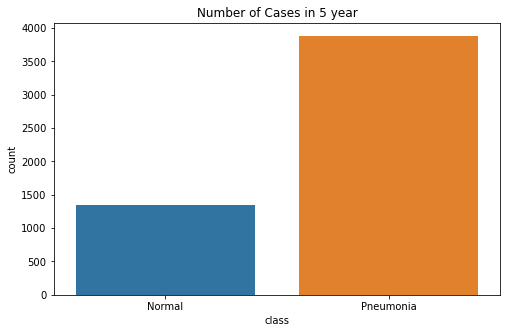

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df_train["class"], data=df_train)
plt.title("Number of Cases in 5 year")
plt.show()

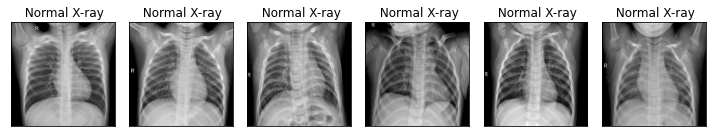

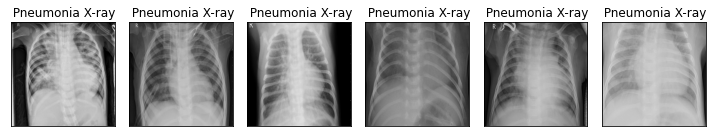

In [ ]:
# taking 6 images and comparing normal and pneumonia side by side
fig, axes = plt.subplots(nrows=1,ncols=6,figsize=(10,8))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img= cv2.resize(img,(512,512))
    ax.imshow(img)
    ax.set_title(" Normal X-ray")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1,ncols =6,figsize=(10,8))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img= cv2.resize(img,(512,512))
    ax.imshow(img)
    ax.set_title(" Pneumonia X-ray")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

### Data Preparation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1/255)

val_datagen = ImageDataGenerator(
                rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
                    train_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

Found 3662 validated image filenames belonging to 2 classes.


In [ ]:
val_generator = val_datagen.flow_from_dataframe(
                    val_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

test_generator = val_datagen.flow_from_dataframe(
                    df_test,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    shuffle=False,
                    seed=7)

Found 1570 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


#### train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df_train,test_size=0.3,random_state = 13, stratify =df_train["class"] )

### Convolutional  Neural Network

In [ ]:
# importing the nnecessary packagess
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten ,BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
#convolution
model.add(Conv2D(filters = 16, kernel_size =(3,3),activation="relu", input_shape=(150,150,3)))
#pooling
model.add(MaxPooling2D(pool_size=(2,2)))
#2nd Convolution
model.add(Conv2D(filters = 32, kernel_size =(3,3),activation="relu"))
#2nd max Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))
#3rd con
model.add(Conv2D(filters = 64, kernel_size =(3,3),activation="relu"))
#3rd pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(Flatten())

#fully connected Layers
model.add(Dense(64, activation="relu"))

model.add(Dense(1,activation="sigmoid"))

## Compile the model

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
             metrics =["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 64)      

### Training the Model

In [ ]:
model_1 = model.fit(train_generator,epochs =10, validation_data =val_generator)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'Equal' defined at (most recent call last):
    File "C:\Users\Prashanta\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Prashanta\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Prashanta\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Prashanta\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Prashanta\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Prashanta\AppData\Local\Temp\ipykernel_24108\355207179.py", line 1, in <cell line: 1>
      model_1 = model.fit(train_generator,epochs =10, validation_data =val_generator)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\engine\training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\engine\training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 646, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\metrics\metrics.py", line 3327, in sparse_categorical_accuracy
      matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "C:\Users\Prashanta\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 893, in sparse_categorical_matches
      matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())
Node: 'Equal'
Incompatible shapes: [32,17,17] vs. [32]
	 [[{{node Equal}}]] [Op:__inference_train_function_887]